In [1]:
import pandas as pd

In [2]:
message = pd.read_csv(r"C:\Imatrius Learning\3 Python\spam1.csv" , encoding='cp1252')
message

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
6772,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
6773,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
6774,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# build the model is predict whether it email is spam or ham

In [7]:
message = message.loc[: ,['v1' ,'v2']]


In [9]:
message.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [11]:
message.rename(columns={'v1':'Y' , 'v2':'X'},inplace=True)

In [13]:
message.head(2)

,Y,X
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [15]:
message.Y.replace({'ham':0 , 'spam':1}, inplace=True)

C:\Users\ashish\AppData\Local\Temp\ipykernel_8048\3387652130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  message.Y.replace({'ham':0 , 'spam':1}, inplace=True)
C:\Users\ashish\AppData\Local\Temp\ipykernel_8048\3387652130.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  message.Y.replace({'

In [17]:
message.head(2)

,Y,X
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [19]:
message['X'] =message['X'].str.lower()

In [21]:
import nltk
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
len(stopwords.words('english'))

179

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
# document is broken into a word
# remove the punicaton
# remove stopwords

In [33]:
def text_process(mess): # creating a function
   '''
   1.remove the punctutation
   2.remove the stopwords
   3.return the list of clean textwords
   '''

   nopunc = [char for char in mess if char not in string.punctuation]
   nopunc = ''.join(nopunc)

   return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [35]:
message['X'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: X, Length: 6776, dtype: object

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['X'])

In [38]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [39]:
len(bow_transformer.vocabulary_)

9422

In [40]:
message_bow =bow_transformer.transform(message.X)

In [41]:
message_bow.shape

(6776, 9422)

In [42]:
type(message_bow)   # Sparse metrix means  mezoricity is zero and

scipy.sparse._csr.csr_matrix

In [43]:
# This TDM act as X and messages.Y
# message_bow ----> X
# message.Y  ------>Y

# Build any model --> Log,dt,rf,nb.

In [44]:
from sklearn.model_selection import train_test_split

message_train_x,message_test_x,message_train_y,message_test_y = train_test_split(message_bow ,message['Y'], test_size=.2)



In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(message_train_x , message_train_y)
pred_test = rf.predict(message_test_x)
pred_test
tab1 = confusion_matrix(message_test_y , pred_test)
print(tab1)
print(classification_report(message_test_y , pred_test))



[[1170    0]
 [  30  156]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1170
           1       1.00      0.84      0.91       186

    accuracy                           0.98      1356
   macro avg       0.99      0.92      0.95      1356
weighted avg       0.98      0.98      0.98      1356



In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(message_train_x , message_train_y)
pred_test = dt.predict(message_test_x)
pred_test
tab1 = confusion_matrix(message_test_y , pred_test)
print(tab1)
print(classification_report(message_test_y , pred_test))

[[1156   14]
 [  23  163]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1170
           1       0.92      0.88      0.90       186

    accuracy                           0.97      1356
   macro avg       0.95      0.93      0.94      1356
weighted avg       0.97      0.97      0.97      1356



In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(message_train_x , message_train_y)
pred_test = logreg.predict(message_test_x)
pred_test
tab1 = confusion_matrix(message_test_y , pred_test)
print(tab1)
print(classification_report(message_test_y , pred_test))

[[1170    0]
 [  17  169]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1170
           1       1.00      0.91      0.95       186

    accuracy                           0.99      1356
   macro avg       0.99      0.95      0.97      1356
weighted avg       0.99      0.99      0.99      1356



In [49]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(message_train_x , message_train_y)
pred_nb = nb.predict(message_test_x)
tab1 = confusion_matrix(message_test_y , pred_test)
print(tab1)
print(classification_report(message_test_y , pred_test))

[[1170    0]
 [  17  169]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1170
           1       1.00      0.91      0.95       186

    accuracy                           0.99      1356
   macro avg       0.99      0.95      0.97      1356
weighted avg       0.99      0.99      0.99      1356



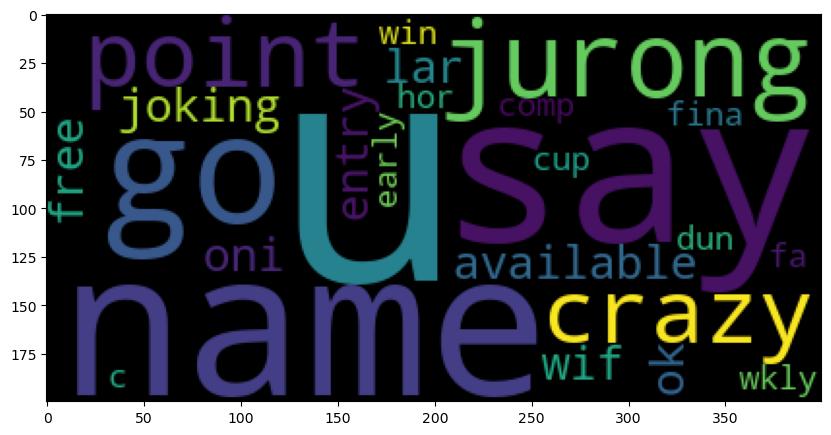

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud =WordCloud(stopwords =stopwords.words('english') , max_words=25).generate(str(message.X))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [89]:
# Divide the ham or spam words
df1 =message[message.Y==0]  # ham
df2 =message[message.Y==1]  #spam

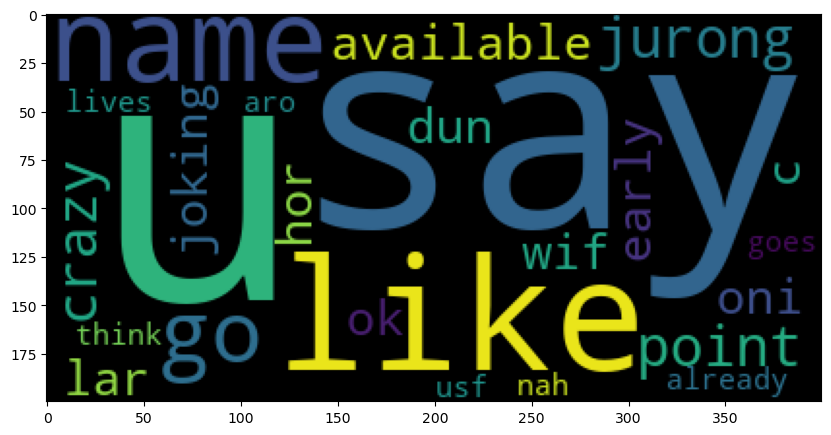

In [91]:
cloud =WordCloud(stopwords =stopwords.words('english') , max_words=25).generate(str(df1.X))   # Ham 
plt.figure(figsize=(10,10))
plt.imshow(cloud)

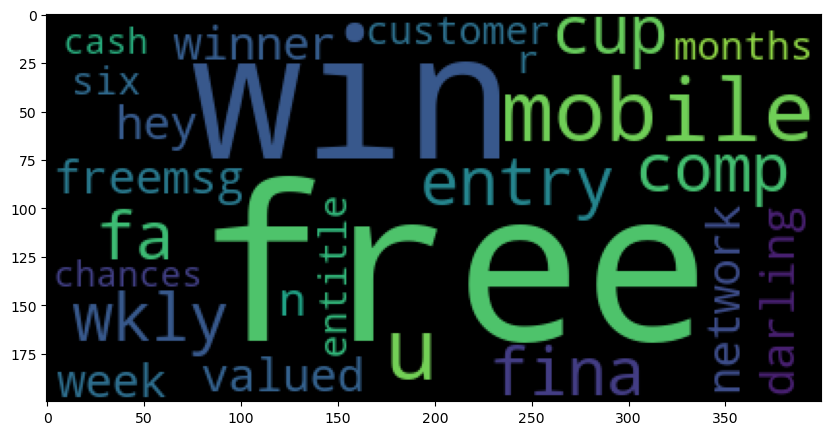

In [93]:
cloud =WordCloud(stopwords =stopwords.words('english') , max_words=25).generate(str(df2.X))  # Spam
plt.figure(figsize=(10,10))
plt.imshow(cloud)